In [1]:
import pandas as pd
import numpy as np

## MSE Cost Function
Linear Model: $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

Goal: Minimize $w$,$b$  

Minimizing error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. 

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In [2]:
def calculate_cost(x, y, w=0, b=0):
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    cost = 1 / (2 * m) * cost

    return cost



$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

The gradient:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$


In [3]:
def calculate_gradient_descent(x, y, w, b):
    m = x.shape[0]    
    derivative_w = 0
    derivative_b = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        derivative_w_i = (f_wb - y[i]) * x[i] 
        derivative_b_i = f_wb - y[i]
        
        #simulataneous updating
        derivative_b += derivative_b_i
        derivative_w += derivative_w_i
        
    return derivative_w/m, derivative_b/m

In [4]:
"""
Data:

1 feature : wx + b

M examples

x: all the x values. 
y: all the y values. 

"""

'\nData:\n\n1 feature : wx + b\n\nM examples\n\nx: all the x values. \ny: all the y values. \n\n'

In [5]:
def gradient_descent(x, y, w_initial, b_initial, alpha, iterations, cost_function, gradient_function): 
    """
    Return Type:
      w (scalar): Updated w with least error (MINIMA)
      b (scalar): Updated b with least error (MINIMA)
      cost_cache (List): Cost values
      values_cache (list): [w,b]
      """
    
    # an array to store cost J and w's at each iteration primarily for graphing later
    cost_cache = []
    values_cache = []
    b = b_initial
    w = w_initial
    
    for i in range(iterations):
        derivative_w, derivative_b = gradient_function(x, y, w , b) 

        # updating w and b until convergence
        w = w - alpha * derivative_w 
        b = b - alpha * derivative_b                                  

        if i<100000:     
            cost_cache.append(cost_function(x, y, w , b))
            values_cache.append([w,b])

    return w, b, cost_cache, values_cache 

In [7]:
df = pd.read_csv('data/height_weight.csv')

#height is independent
#weight is dependent

In [8]:
print(df["height"])

0     56.5
1     65.3
2     64.3
3     56.3
4     59.8
5     66.5
6     67.0
7     57.3
8     62.5
9     59.0
10    72.0
11    64.8
12    57.5
13    66.5
Name: height, dtype: float64


In [9]:
w_initial = 0
b_initial = 0
iterations = 10000
learning_rate = 6.0e-4

x = np.array(df["height"])
y = np.array(df["weight"])

print(x)
print(y)

[56.5 65.3 64.3 56.3 59.8 66.5 67.  57.3 62.5 59.  72.  64.8 57.5 66.5]
[ 84.   98.   90.   77.   84.5 112.  133.   83.   84.   99.5 150.  128.
  85.  112. ]


In [10]:
# Z-Score Normalization

x_mean,x_std = np.mean(x),np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean,y_std = np.mean(y),np.std(y)
y_normalized = (y - y_mean) / y_std


In [11]:
w_final, b_final, cost_cache, values_cache = gradient_descent(x_normalized,y_normalized, w_initial, b_initial, learning_rate, 
                                                    iterations, calculate_cost, calculate_gradient_descent)

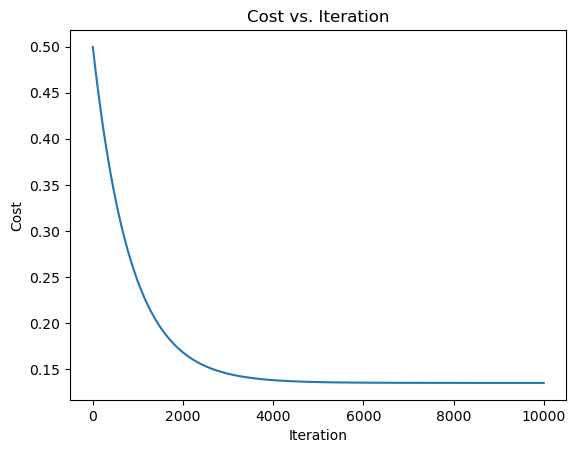

In [12]:
#NOTE: I looked at the Cost Vs Iteration graph and kept changing the learning rate best fit for my data

import matplotlib.pyplot as plt
plt.figure()
plt.plot(cost_cache)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.show()


In [13]:
print(w_final)

0.8521053520896864


In [14]:
print(b_final)

-9.918185320653458e-16


In [15]:
from sklearn.linear_model import LinearRegression

x_new = x.reshape(-1, 1)


reg = LinearRegression()

#training
reg.fit(x_new, y)
print("Intercept: ", reg.intercept_)
print("Slope: ", reg.coef_[0])

Intercept:  -145.77332096327177
Slope:  3.9538746640989433


In [16]:
new_height = np.array([[70]])  # input must be 2D array
predicted_weight = reg.predict(new_height)

print("Predicted weight: ", predicted_weight)


#normalised height = 70
height_normalized = (70 - x_mean) / x_std

#predicting y 
weight_normalized_predicted = w_final * height_normalized + b_final

# getting back the original denormalised
weight_predicted = weight_normalized_predicted * y_std + y_mean

print("Custom:",weight_predicted)


Predicted weight:  [130.99790552]
Custom: 130.92474233753015


In [17]:
score = reg.score(x_new, y)
print("R-squared: ", score)

#accuracy of the model

R-squared:  0.7296899970051747


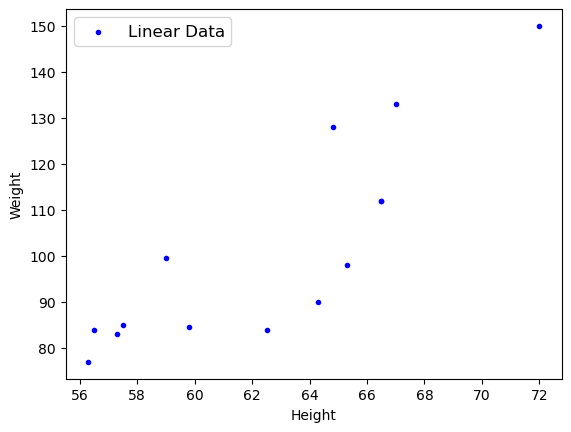

In [18]:
fig, ax = plt.subplots(1,1)
ax.scatter(x, y, marker='.', c='b', label="Linear Data")
ax.legend( fontsize='large')
ax.set_ylabel('Weight')
ax.set_xlabel('Height')
plt.show()

In [19]:
'''
denormalized_w = normalized_w *  std(y)/std(x) 
denormalized_b = mean(y) - denormalized_w * mean(x)
'''

denormalized_w_final = w_final * (np.std(y) / np.std(x))

denormalized_b_final = np.mean(y) - (denormalized_w_final * np.mean(x))

print(f"Custom (Denormalization):\nw: {denormalized_w_final}\nb:{denormalized_b_final}\n")
print(f"Model:\nw: {reg.coef_[0]}\nb:{reg.intercept_}")

Custom (Denormalization):
w: 3.9440916210642034
b:-145.16167113696406

Model:
w: 3.9538746640989433
b:-145.77332096327177


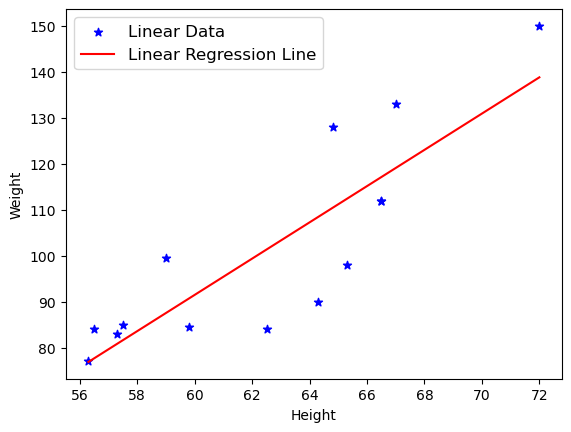

In [20]:
# Scatter plot of the data points (ORIGINAL DATA)
plt.scatter(x, y, marker='*', c='b', label="Linear Data")
plt.ylabel('Weight')
plt.xlabel('Height')


# Plotting the linear regression line
x_line = np.linspace(min(x), max(x), 100)
y_line = denormalized_w_final * x_line + denormalized_b_final
plt.plot(x_line, y_line, color='r', label="Linear Regression Line")


plt.legend(fontsize='large')
plt.show()


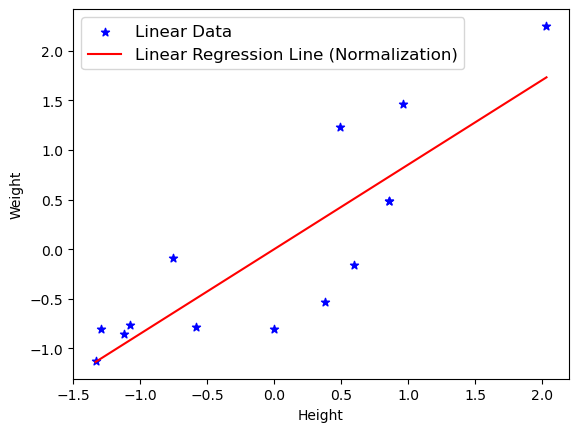

In [21]:
# Scatter plot of the data points (NORMALIZED DATA)
plt.scatter(x_normalized, y_normalized, marker='*', c='b', label="Linear Data")
plt.ylabel('Weight')
plt.xlabel('Height')

# Plotting the linear regression line
x_line_normalized = np.linspace(min(x_normalized), max(x_normalized), 100)
y_line_normalized = w_final * x_line_normalized + b_final
plt.plot(x_line_normalized, y_line_normalized, color='r', label="Linear Regression Line (Normalization)")


plt.legend(fontsize='large')
plt.show()
